# Dataset exploration, cleaning, preprocessing, initial system diagram

## Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import joblib   # record scaler

## Task 1 Import Kaggle dataset into environment

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Task 2 Explore dataset structure and features

In [3]:
#Show all column
pd.set_option('display.max_columns', None) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


## Task 3 Handle missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Task 4 Encode categorical variables
- Attrition
- BusinessTravel
- Department
- EducationField
- Gender
- JobRole
- MaritalStatus
- Over18
- OverTime

In [8]:
#Create a new dataframe df1 as a copy of df
df1 = df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# Show the count of each unique category in the 'BusinessTravel' column
df1["BusinessTravel"].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [11]:
# Define a dictionary for Ordinal Encoding
cleanup_nums = {"BusinessTravel":   {"Non-Travel" : 0, "Travel_Rarely" : 1, "Travel_Frequently": 2} }

In [12]:
# Apply the mapping to the df1 DataFrame
df1 = df1.replace(cleanup_nums)

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1510/116493314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace(cleanup_nums)


In [13]:
# Display the first 5 rows of the updated DataFrame to verify the transformation
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,2,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,2,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,1,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
# Show the count of each unique category in the 'Attrition' column
df1["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [15]:
# Define a dictionary for Ordinal Encoding
cleanup_nums = {"Attrition":   {"No" : 0, "Yes" : 1,} }

In [16]:
# Apply the mapping to the df1 DataFrame
df1 = df1.replace(cleanup_nums)

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1510/116493314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace(cleanup_nums)


In [17]:
# Display the first 5 rows of the updated DataFrame to verify the transformation
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [18]:
# Show the count of each unique category in the 'Department' column
df1["Department"].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [19]:
# Define a dictionary for Ordinal Encoding
cleanup_nums = {"Department":   {"Human Resources" : 0, "Sales" : 1, "Research & Development": 2} }

In [20]:
# Apply the mapping to the df1 DataFrame
df1 = df1.replace(cleanup_nums)

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1510/116493314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace(cleanup_nums)


In [21]:
# Display the first 5 rows of the updated DataFrame to verify the transformation
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [22]:
# Show the count of each unique category in the 'EducationField' column
df1["EducationField"].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [23]:
# Define a dictionary for Ordinal Encoding
cleanup_nums = {"EducationField":   {"Other" : 0, "Human Resource" : 1, "Technical Degree": 2, "Marketing": 3, "Medical": 4, "Life Sciences":5} }

In [24]:
# Apply the mapping to the df1 DataFrame
df1 = df1.replace(cleanup_nums)

In [25]:
# Display the first 5 rows of the updated DataFrame to verify the transformation
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,5,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,5,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,0,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,5,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [26]:
# Show the count of each unique category in the 'Gender' column
df1["Gender"].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [27]:
# Define a dictionary for Ordinal Encoding
cleanup_nums = {"Gender":   {"Female" : 0 , "Male" : 1} }

In [28]:
# Apply the mapping to the df1 DataFrame
df1 = df1.replace(cleanup_nums)

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1510/116493314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace(cleanup_nums)


In [29]:
# Display the first 5 rows of the updated DataFrame to verify the transformation
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,5,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,5,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,0,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,5,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [30]:
# Show the count of each unique category in the 'JobRole' column
df1["JobRole"].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [31]:
# Define a dictionary for Ordinal Encoding
cleanup_nums = {"JobRole":   {"Sales Executive" : 0, "Research Scientist" : 1, "Laboratory Technician" : 2, "Manufacturing Director" : 3, "Healthcare Representative" : 4, "Manager" : 5, "Sales Representative" : 6, "Research Director" : 7, "Human Resources" : 8} }

In [32]:
# Apply the mapping to the df1 DataFrame
df1 = df1.replace(cleanup_nums)

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1510/116493314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace(cleanup_nums)


In [33]:
# Display the first 5 rows of the updated DataFrame to verify the transformation
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,5,1,1,2,0,94,3,2,0,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,5,1,2,3,1,61,2,2,1,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,0,1,4,4,1,92,2,1,2,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,5,1,5,4,0,56,3,1,1,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,7,1,1,40,3,1,2,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [34]:
# Show the count of each unique category in the 'MaritalStatus' column
df1["MaritalStatus"].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [35]:
# Define a dictionary for Ordinal Encoding
cleanup_nums = {"MaritalStatus":   {"Divorced" : 0 , "Single" : 1, "Married" : 2} }

In [36]:
# Apply the mapping to the df1 DataFrame
df1 = df1.replace(cleanup_nums)

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1510/116493314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace(cleanup_nums)


In [37]:
# Display the first 5 rows of the updated DataFrame to verify the transformation
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,5,1,1,2,0,94,3,2,0,4,1,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,5,1,2,3,1,61,2,2,1,2,2,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,0,1,4,4,1,92,2,1,2,3,1,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,5,1,5,4,0,56,3,1,1,3,2,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,7,1,1,40,3,1,2,2,2,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [38]:
# Show the count of each unique category in the 'Over18' column
df1["Over18"].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [39]:
# Define a dictionary for Ordinal Encoding
cleanup_nums = {"Over18":   {"Yes" : 1} }

In [40]:
# Apply the mapping to the df1 DataFrame
df1 = df1.replace(cleanup_nums)

In [41]:
# Display the first 5 rows of the updated DataFrame to verify the transformation
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,5,1,1,2,0,94,3,2,0,4,1,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,5,1,2,3,1,61,2,2,1,2,2,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,0,1,4,4,1,92,2,1,2,3,1,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,5,1,5,4,0,56,3,1,1,3,2,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,7,1,1,40,3,1,2,2,2,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [42]:
# Show the count of each unique category in the 'OverTime' column
df1["OverTime"].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [43]:
# Define a dictionary for Ordinal Encoding
cleanup_nums = {"OverTime":   {"No" : 0 , "Yes" : 1} }

In [44]:
# Apply the mapping to the df1 DataFrame
df1 = df1.replace(cleanup_nums)

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1510/116493314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace(cleanup_nums)


In [45]:
# Display the first 5 rows of the updated DataFrame to verify the transformation
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,5,1,1,2,0,94,3,2,0,4,1,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,5,1,2,3,1,61,2,2,1,2,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,0,1,4,4,1,92,2,1,2,3,1,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,5,1,5,4,0,56,3,1,1,3,2,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,7,1,1,40,3,1,2,2,2,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


# Task 5 Encode categorical variables

In [46]:
# 1) Specify target and identifiers that should NOT be scaled
target_col = 'Attrition' # Adjust according to your target column name
id_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'] # Add any ID-like columns here (e.g., EmployeeCount, StandardHours)
exclude_cols = [target_col] + id_cols

# 2) Split features and target
X = df1.drop(columns=exclude_cols)
y = df1[target_col]

# 3) Split into train/test sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Identify continuous numerical columns (only these will be scaled)
# Simple way: select numeric columns but exclude dummy/binary ones if desired
numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

# Optionally separate binary dummy columns (0/1) from continuous columns
# You can use a threshold — if a column has only 2 unique values, treat it as binary
binary_cols = [c for c in numeric_cols if X_train[c].nunique() == 2]
continuous_cols = [c for c in numeric_cols if c not in binary_cols]

print("Continuous cols to scale:", continuous_cols)
print("Binary cols (left as-is):", binary_cols)

# 5) Choose a scaler (StandardScaler by default, but RobustScaler/MinMaxScaler can be used)
scaler = StandardScaler()   # or RobustScaler() / MinMaxScaler()

# 6) Fit the scaler ONLY on the training data (to prevent data leakage)
scaler.fit(X_train[continuous_cols])

# 7) Transform both training and test sets (and future unseen data) using the same scaler
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[continuous_cols] = scaler.transform(X_train[continuous_cols])
X_test_scaled[continuous_cols]  = scaler.transform(X_test[continuous_cols])

# 8) Optionally combine back into DataFrames with the target variable
train_df = X_train_scaled.copy()
train_df[target_col] = y_train.values

test_df = X_test_scaled.copy()
test_df[target_col] = y_test.values

# 9) Save the scaler for deployment/inference use
joblib.dump(scaler, "scaler_standard.pkl")

# 10) Save processed datasets for the next stage (optional)
train_df.to_csv("train_scaled.csv", index=False)
test_df.to_csv("test_scaled.csv", index=False)

print("✅ Scaling complete. Scaler saved to 'scaler_standard.pkl'")
print("Train/Test shapes:", train_df.shape, test_df.shape)

Continuous cols to scale: ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Binary cols (left as-is): ['Gender', 'OverTime', 'PerformanceRating']
✅ Scaling complete. Scaler saved to 'scaler_standard.pkl'
Train/Test shapes: (1176, 31) (294, 31)


In [47]:
df_test = pd.read_csv('test_scaled.csv')

In [48]:
df_test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-1.416826,-2.023622,0.064832,-1.076654,0.445433,-0.882152,5,1.179114,0,0.613808,0.373564,-0.986265,1.503529,-0.647997,0.965162,-0.969745,-1.013556,-0.681293,0,-0.609051,3,0.240218,0.247430,-1.329148,-0.605389,0.337621,-0.994436,-1.185905,-0.679165,-1.177687,0
1,0.763191,-0.161510,0.780241,0.691705,-0.899915,-1.855332,5,-1.577622,0,0.319180,1.795282,-0.986265,-0.657495,1.153526,0.965162,-0.974474,0.777738,-0.681293,0,-0.609051,3,1.160403,0.247430,-0.175017,1.783664,0.337621,0.484849,0.215446,1.498820,0.786795,0
2,-0.653820,-0.161510,-0.289134,-1.076654,-0.288393,0.091029,5,0.260202,1,-1.055750,-1.048155,0.846038,1.071324,1.153526,-1.559934,1.077650,1.516147,2.537997,0,1.566330,4,0.240218,0.247430,-0.175017,0.190962,-1.055510,-0.336976,-0.064824,-0.679165,-0.897047,0
3,0.763191,-0.161510,0.984644,0.691705,-0.655306,-0.882152,5,0.260202,1,1.301274,1.795282,2.678340,1.071324,-1.548758,-1.559934,2.718533,0.429326,-0.681293,0,-0.337129,3,1.160403,1.430265,1.876772,0.987313,-1.055510,2.950322,1.336527,3.676804,2.470637,0
4,-0.108815,-0.161510,-1.211439,0.691705,-0.043784,0.091029,4,1.179114,1,0.662913,-1.048155,-0.986265,-0.657495,0.252765,0.965162,-0.678457,1.027398,-1.083704,1,0.478639,3,-1.600151,0.247430,-1.200911,-2.198092,-1.055510,-0.994436,-1.185905,-0.679165,-1.177687,1


In [49]:
df_train = pd.read_csv('train_scaled.csv')

In [50]:
df_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1.090194,-0.161510,1.049455,-1.076654,-0.899915,1.064209,5,-0.658710,0,-0.908436,1.795282,1.762189,1.071324,-0.647997,-1.559934,2.026752,0.931289,1.330763,0,-0.337129,3,0.240218,2.613100,2.261482,-0.605389,0.337621,-0.665706,-0.625365,-0.368024,-0.616406,0
1,-1.634828,-0.161510,-0.523449,0.691705,-0.899915,-1.855332,2,0.260202,1,1.694111,0.373564,-0.986265,-0.225290,1.153526,0.965162,-0.864408,0.682742,-1.083704,0,-0.337129,3,0.240218,0.247430,-1.072675,-0.605389,0.337621,-0.830071,-0.905635,-0.056884,-0.897047,0
2,0.981193,-0.161510,-0.992080,-1.076654,-0.777610,-1.855332,3,-1.577622,1,-0.662913,0.373564,1.762189,1.071324,0.252765,0.965162,2.347706,0.167705,0.123529,0,-0.880974,3,1.160403,0.247430,1.492061,0.190962,0.337621,0.813578,1.336527,0.565398,1.348076,0
3,-1.307825,-0.161510,-0.453653,-1.076654,0.445433,-1.855332,4,-0.658710,1,-1.252169,0.373564,-0.986265,1.503529,0.252765,0.965162,-0.956202,1.667056,-0.681293,0,-1.152896,3,0.240218,-0.935405,-0.559727,-1.401740,0.337621,-0.008246,-0.064824,-0.679165,0.506155,0
4,0.654191,1.700602,0.491086,0.691705,-0.043784,2.037390,4,1.179114,1,0.319180,0.373564,-0.070114,-0.225290,0.252765,-1.559934,-0.185956,0.728362,0.123529,1,-0.609051,3,-0.679966,0.247430,-0.175017,0.190962,0.337621,0.156119,0.775986,0.565398,0.786795,0


In [51]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,5,1,1,2,0,94,3,2,0,4,1,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,5,1,2,3,1,61,2,2,1,2,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,0,1,4,4,1,92,2,1,2,3,1,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,5,1,5,4,0,56,3,1,1,3,2,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,7,1,1,40,3,1,2,2,2,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,2,23,2,4,1,2061,3,1,41,4,2,2,4,2,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,2,6,1,4,1,2062,4,1,42,2,3,4,1,2,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,2,4,3,5,1,2064,2,1,87,4,2,3,2,2,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,1,2,3,4,1,2065,4,1,63,2,2,0,2,2,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8


# Train intial ML model, feature importance analysis

## Task 6 Identify key drivers (salary, job satisfaction, tenure)

Correlation of features with Attrition:
                    Attrition
Attrition            1.000000
OverTime             0.214389
BusinessTravel       0.135607
DistanceFromHome     0.086744
NumCompaniesWorked   0.048648
Gender               0.024785
MonthlyRate          0.021787
PerformanceRating    0.007047
PercentSalaryHike   -0.009148
HourlyRate          -0.019400

Selected key driver correlations:
                 JobSatisfaction  Attrition
JobSatisfaction         1.000000  -0.103397
Attrition              -0.103397   1.000000


/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1510/2134008247.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr["Attrition"].head(10), y=corr.head(10).index, palette="viridis")


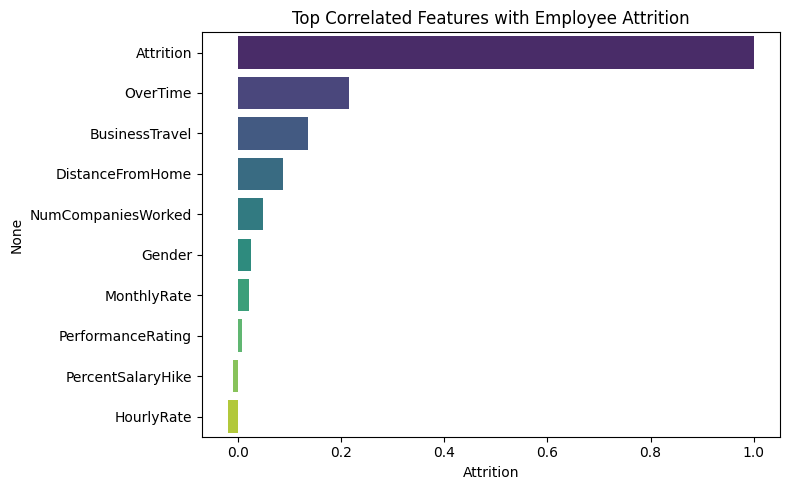

In [52]:
# Task 1 - Identify key drivers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("train_scaled.csv")

# Correlation with target (Attrition)
corr = df.corr(numeric_only=True)[["Attrition"]].sort_values(by="Attrition", ascending=False)
print("Correlation of features with Attrition:")
print(corr.head(10))

# Focus on known potential drivers
drivers = ["Salary", "JobSatisfaction", "Tenure"]
available_drivers = [col for col in drivers if col in df.columns]

if available_drivers:
    print("\nSelected key driver correlations:")
    print(df[available_drivers + ["Attrition"]].corr())
else:
    print("\n⚠️ Driver columns not found in dataset — check column names.")

# Plot top correlated features
plt.figure(figsize=(8,5))
sns.barplot(x=corr["Attrition"].head(10), y=corr.head(10).index, palette="viridis")
plt.title("Top Correlated Features with Employee Attrition")
plt.tight_layout()
plt.show()


## Task 7 Derived features if needed

In [53]:
# Derived features
df = pd.read_csv("train_scaled.csv")

# Example derived features
if "Tenure" in df.columns and "Salary" in df.columns:
    df["SalaryPerYearTenure"] = df["Salary"] / (df["Tenure"] + 1)

if "JobSatisfaction" in df.columns and "Tenure" in df.columns:
    df["Satisfaction_Tenure_Interaction"] = df["JobSatisfaction"] * df["Tenure"]

# Optional: Binning tenure
if "Tenure" in df.columns:
    df["Tenure_Bin"] = pd.cut(df["Tenure"], bins=[0,2,5,10,20,40], labels=["<2","2-5","5-10","10-20","20+"])

# One-hot encode categorical columns (if any)
df = pd.get_dummies(df, drop_first=True)

df.to_csv("train_scaled_derived.csv", index=False)
print("✅ Derived features created and saved to train_scaled_derived.csv")


✅ Derived features created and saved to train_scaled_derived.csv


## Task 8 Train Logistic Regression, Random Forest

In [54]:
#Train models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("train_scaled_derived.csv")
target = "Attrition"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Logistic Regression
log_model = LogisticRegression(max_iter=500, class_weight='balanced')
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight='balanced'
)
rf_model.fit(X_train, y_train)

print("✅ Models trained: Logistic Regression, Random Forest")




✅ Models trained: Logistic Regression, Random Forest


## Task 8 Train Logistic Regression, Random Forest, CatBoost

In [55]:
#Train models (Logistic Regression, Random Forest, CatBoost)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# Load dataset
df = pd.read_csv("train_scaled_derived.csv")
target = "Attrition"

# Split features and target
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Logistic Regression (baseline, interpretable)
log_model = LogisticRegression(
    max_iter=500,
    class_weight='balanced',
    random_state=42
)
log_model.fit(X_train, y_train)

# Random Forest (nonlinear, robust)
rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

# CatBoost (fast, accurate, Mac-friendly)
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    class_weights=[1, 2],  # handle imbalance
    verbose=0,
    random_state=42
)
cat_model.fit(X_train, y_train)

print("✅ Models trained successfully:")
print("   • Logistic Regression (baseline, interpretable)")
print("   • Random Forest (nonlinear, robust)")
print("   • CatBoost (fast, accurate, Mac-friendly)")

✅ Models trained successfully:
   • Logistic Regression (baseline, interpretable)
   • Random Forest (nonlinear, robust)
   • CatBoost (fast, accurate, Mac-friendly)


## Task 9 TEvaluate performance (Accuracy, Precision, Recall, F1-score) - New

In [57]:
# Evaluate performance (Accuracy, Precision, Recall, F1-score)
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, name):
    """Evaluate a model and return performance metrics"""
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }

# Evaluate all trained models
results = []
results.append(evaluate_model(log_model, X_test, y_test, "Logistic Regression"))
results.append(evaluate_model(rf_model, X_test, y_test, "Random Forest"))
results.append(evaluate_model(cat_model, X_test, y_test, "CatBoost"))

# Combine results into DataFrame
results_df = pd.DataFrame(results)

# Display
print("\n📊 Model Comparison:")
print(results_df.sort_values(by="F1", ascending=False).reset_index(drop=True))


📊 Model Comparison:
                 Model  Accuracy  Precision    Recall        F1
0             CatBoost  0.889831   0.833333  0.394737  0.535714
1  Logistic Regression  0.745763   0.358974  0.736842  0.482759
2        Random Forest  0.855932   0.833333  0.131579  0.227273


## Task 10 Select best-performing model - New

In [59]:
# Select best-performing model and add resignation probability
import pandas as pd

# Identify best model based on F1-score
best_model_row = results_df.sort_values(by="F1", ascending=False).iloc[0]
best_model_name = best_model_row["Model"]

# Map model name to model object
if best_model_name == "Logistic Regression":
    best_model = log_model
elif best_model_name == "Random Forest":
    best_model = rf_model
elif best_model_name == "CatBoost":
    best_model = cat_model
else:
    raise ValueError(f"Unknown model selected: {best_model_name}")

print(f"\n🏆 Best Model Based on F1-Score: {best_model_name}")

# Add predicted resignation probability column to the dataset
df["employee_resignation_probability"] = best_model.predict_proba(X)[:, 1]

# Save final dataset
df.to_csv("train_with_resignation_probabilities.csv", index=False)

print("✅ Added 'employee_resignation_probability' and saved final dataset as 'train_with_resignation_probabilities.csv'.")


🏆 Best Model Based on F1-Score: CatBoost
✅ Added 'employee_resignation_probability' and saved final dataset as 'train_with_resignation_probabilities.csv'.
